# 1.   Wstęp



W celu uzupełnienia brakujących danych zastosowano imputację dedukcyjną na podstawie tytułów ogłoszeń oraz iteracyjną imputację, przewidującą brakujące wartości przy użyciu regresji bayesowskiej. Do predykcji cen mieszkań wykorzystano siedem różnych modeli regresyjnych, które zostały zoptymalizowane poprzez ręczne dostosowanie hiperparametrów, a następnie połączone w jeden model przy użyciu *StackingRegressor*. \
Przedstawiony w raporcie model osiągnął wynik **83832.05** na platformie Kaggle **(nick: dominikaczubinska)**. \
W projekcie wykorzystano głównie *ChatGPT* do generowania kodu oraz wbudowanego w Colab narzędzia *Gemini* w przypadku napotkania błędów w kodzie. \
Czas generowania kodu: ok. 40 min




# 2. Metodyka

Na wstępie połączono zbiory df_train i df_test w jeden DataFrame i przeprowadzono szczegółową jego analizę. Przede wszytskim utworzono dwie nowe kolumny 'month' i 'year' na podstawie daty aktywacji ogłoszenia i zakodowane je jako zmienne binarne. W dalszej kolejności wyświetlono ilość braków danych w poszczególnych kolumnach i dokonano przekształcenia zmiennych typu bool na typ całkowity (int). Dodatkowo zamieniono błędne wartości na NaN, takie jak np. ujemne wartości powierzchni i liczby pokoi.

W projekcie zastosowano dwie metody imputacji brakujących danych. Pierwszą była dedukcyjna imputacja, która polegała na uzupełnianiu brakujących wartości na podstawie tytułów ogłoszeń. W przypadku, gdy dane te nie były dostępne, zastosowano iteracyjną imputację, w której brakujące wartości były przewidywane na podstawie zależności między innymi cechami w zbiorze danych, przy użyciu domyślnego dla IterativeImputer modelu regresji: *BayesianRidge*. W celu oceny wpływu imputacji na dane, porównano rozkład, macierz korelacji i statystyki opisowe przed i po jej przeprowadzeniu. Po imputacji rozdzielono dane z powrotem na df_train i df_test.

Przed przystąpieniem do predykcji, ze zbioru danych df_train usunięto 6 zduplikowanych wierszy oraz za pomocą wykresów punktowych łącznie 7 wierszy z odstajacymi wartościami powierzchni (flat_area), kaucji (flat_deposit) i czyszu (flat_rent). Przy użyciu *One-Hot Encoding* przekształceno zmienną 'quarter', tworząc nowe kolumny dla każdej dzielnicy, a następnie łącząc je z resztą cech, usuwając pierwotną kolumnę 'quarter' z danych treningowych.

Zbiór danych df_train został rozdzielony na zmienne objaśniające X (usuwajac przy tym zbędne kolumny) oraz zmienną objaśnianą y (cena), a następnie podzielono go na zbiór treningowy (80%) i testowy (20%). W pierwszej kolejności przeprowadzono porównanie wyników dziesięciu różnych algorytmów regresyjnych, wykorzystując ich domyślne ustawienia parametrów. Celem było zidentyfikowanie modeli, które osiągają najwyższe współczynniki R², co pozwoliło wybrać najlepsze algorytmy do dalszej optymalizacji.
Dla siedmiu wybranych modeli (CatBoost, RandomForest, Bagging, AdaBoost, LGBM, ExtraTrees, XGBoost), przeprowadzono ręcznie, metodą prób i błedów proces optymalizacji hiperparametrów aby znaleźć najbardziej efektywne ustawienia dla każdego z nich. Przeszukiwanie siatki hiperparametrów za pomocą GridSearchCV trwało bardzo długo i często kończyło się rozłączeniem ze środowiskiem. Z kolei zastosowanie RandomSearchCV nie przyniosło optymalnych rezultatów, a czas obliczeń także był długi. Następnie zastosowano dwie metody uczenia zespołowego VotingRegressor i StackingRegressor. Pozwoliły one wykorzystanie mocnych stron różnych algorytmów i poprawę dokładności końcowej prognozy. Choć oba podejścia łączą wyniki różnych modeli regresyjnych, StackingRegressor poradził sobie lepiej i został zastosowany do predykcji cen mieszkań na zbiorze testowym df_test.

Zauważono również, że w tytułach ogłoszeń w zbiorze danych df_test, można znaleźć informacje o cenach mieszkań. W związku z tym, zastąpiono ceny wartościami z tytułu i wygenerowano nowy plik csv.  Nie jest to predykcja cen oparta na zastosowaniu modeli, więc podejście to traktowane jest jako dodatek w celu sprawdzenia o ile poprawi się wynik na Kaggle.

# 3. Wyniki

Swoje rozwiązanie na platformie Kaggle sprawdziłam łącznie 24 razy (bez wliczania pierwszego, testowego na zajęciach). \

Uzyskane wyniki:

Przy pierwszych czterech podejściach nie brano pod uwagę zmiennej 'quarter' - usunięto ją ze zbioru cech. Wyniki różniły się w zależności jakie bazowe modele zostały zastosowane w StackingRegressor (z regresją liniową jako model finalny).
W kolejnch podejściach do zbioru cech dodano zmienną quarter odpowiednio ją przekształcajac przy użyciu One-Hot Encoding.

* podejscie_1: 91841.04
* podejscie_2: 89759.40
* podejscie_3: 89463.22
* podejscie_4: 90135.83 \

W podejściu piątym zastsowano sam model CatBoost z dobranymi hiperparametrami.

* podejscie_5: 92988.77

W podjeściu szóstym, siódmym i ósmym zastosowano ponownie StackingRegressor (z regresją liniową jako model finalny) z różnymi modelami bazowymi.

* podejscie_6: 89463.20
* podejscie_7: 86265.49
* podejscie_8: 84539.79

W dziewiątym podejściu zastosowano ponownie StackingRegressor ze wszystkimi siedmioma modalmi bazowymi. Jako model łączący zastosowano ElasticNet.

* podejscie_9: 83717.93

Do dalszych podejść dodano dwie nowe kolumny 'month' i 'year', kodując je jako zmienne binarne.

* podejscie_10: 83542.00 - StackingRegressor (7 modeli)
* podejscie_11: 84844.51 - VotingRegressor (7 modeli)

Następnie próbowano zlogarytmować wartości zmiennych takich jak 'flat_area', flat_deposit' i 'flat_rent', jednak wyniki były gorsze od porzednich dlatego pozostawiono orginalne wartości bez przekształcania.

* podejscie_12: 83884.40 - StackingRegressor (6 modeli)
* podejscie_13: 83945.91 - StackingRegressor (7 modeli)

Później zauważono, że w tytułach ogłoszeń w zbiorze danych df_test, można również znaleźć informacje o cenach mieszkań. Wykorzystano podejscie 10, które do tej pory dało najlepszy wynik i zastąpiono ceny niektórych mieszkań wartościami z tytułu i wygenerowano nowy plik csv.

* **podejscie_14: 82361.20 - mój najlepszy uzyskany wynik**  

Następnie usunięto duplikaty ze zbioru df_train oraz wiersze z odstającącymi wartościami. Zmieniono niektóre wartości hiperparametrów modeli aby dawały jeszcze lepsze wyniki lecz po wrzuceniu kolejnych sześciu plików csv na Kaggle predykcje uzyskiwały gorsze wyniki.
[Uważam, że usunięcie odstających wartości ze zbioru to kluczowy krok, który powinien poprawić jakość modelu, minimalizując wpływ nietypowych obserwacji i zwiększyć dokładność prognoz, dlatego nie usunęłam tego etapu z kodu.]

Zastosowano ponownie StackingRegressor (z ElasticNet jako model finalny) z 7 modelami bazowymi.
* podejscie_21: 84839.80   

Po zastąpieniu cen niektórych mieszkań wartościami z tytułu uzyskano o 1000 punktów lepszy wynik.
* **podejscie_22: 83832.05 - przedstawiony w raporcie model**

Na końcu wyszukano około 20 ogłoszeń które były identyczne w zbiorze df_train i df_test. Jednak po zamienieniu niektórych cen wyniki były gorsze, dlatego usunięto ten fragemt kodu.

* podejscie_23: 83978.69
* podejscie_24: 84033.83


# 4. Podsumowanie


W trakcie realizacji projektu nauczyłam się, jak różne metody imputacji oraz modele regresji działają, a także jak można je efektywnie łączyć, aby uzyskać lepsze wyniki. Uważam, że poprawa jakości danych poprzez imputację była kluczowa do dalszej analizy i modelowania.
Najbardziej zdziwiło mnie to, że po usunięciu wartości odstających wyniki wcale się nie poprawiły.

Mimo że połączyłam aż siedem (niektórych bardzo podobnych) modeli regresyjnych w jeden, to właśnie ta kombinacja okazała się najbardziej efektywna i pozwoliła uzyskać najlepszy wynik predykcji. Myślę, że zastosowane w projekcie modele mogłyby sobie poradzić lepiej jeśli usunęłabym ze zbioru X kolumnę 'month' i 'year' o czym zapomniałam.

W trakcie realizacji projektu, modele LLM, takie jak Gemini i ChatGPT, okazały się bardzo pomocne. Gemini szybko radził sobie w wykrywaniu błędów w kodzie. ChatGPT pomagał w generowaniu kodu oraz proponował różne metody i rozwiązania, które można by było dodać aby poprawić wynik predykcji.


# 5. Kody do odtworzenia wyników


##5.1 Instalacja/wczytanie pakietów

In [1]:
!pip install pygam
!pip install catboost
!pip install --upgrade xgboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [2]:
pip install scikit-learn==1.2.2  # wymagane do niektórych metod regresji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import re
import random

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import RANSACRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
import lightgbm as lgb


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 5.2 Wczytanie danych

In [4]:
train_data = pd.read_csv('/content/sample_data/pzn-rent-train.csv')
test_data = pd.read_csv('/content/sample_data/pzn-rent-test.csv')

## 5.3 Wstępna analiza danych

In [5]:
# Dane treningowe
train_data.head()
train_data['test/train'] = 'train' # dodanie dodatkowej kolumny z wartością 'train'

In [6]:
# Dane testowe
test_data.head()
test_data['test/train'] = 'test' # dodanie dodatkowej kolumny z wartością 'test'

In [7]:
# Połączenie zbiorów w jeden DataFrame
df = pd.concat([test_data, train_data], ignore_index=True)
df.head()

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,flat_cooker,flat_oven,flat_internet,flat_television,flat_anti_blinds,flat_monitoring,flat_closed_area,quarter,test/train,price
0,4,wynajmę mieszkanie poznan,2014-08-10,2020-03-03,2020-03-10,True,49.0,2.0,True,0,...,True,True,False,False,False,False,False,Górna Wilda,test,NaN
1,5,Kawalerka Poznań Rataje niska zabudowa 2 piętro,2014-08-17,2019-11-15,2019-12-15,True,NaN,NaN,True,350,...,True,True,False,False,False,True,False,NaN,test,NaN
2,9,"Kawalerka, w szeregowcu z osobnym wejściem",2014-09-23,2019-11-13,2019-12-12,True,NaN,NaN,True,300,...,True,False,NaN,True,True,False,NaN,NaN,test,NaN
3,20,Wynajmę mieszkanie 4 pokojowe Winogrady,2015-01-29,2019-06-03,2019-07-01,True,-999.0,4.0,True,700,...,True,True,NaN,False,False,False,False,Winogrady,test,NaN
4,23,Apartament z tarasem na dachu,2015-03-04,2019-11-07,2019-11-27,True,76.0,3.0,True,800,...,True,True,True,True,False,False,NaN,Rataje,test,NaN


In [8]:
# Konwersja kolumny 'date_activ' na format daty
df['date_activ'] = pd.to_datetime(df['date_activ'])

# Utworzenie nowej kolumny 'month', wyciągając miesiąc z kolumny 'date_activ'
df['month'] = df['date_activ'].dt.month

# Utworzenie nowej kolumny 'year', wyciągając rok z kolumny 'date_activ'
df['year'] = df['date_activ'].dt.year

In [9]:
# Zakodowanie miesięcy jako zmiennych binarnych
for month in range(1, 13):
    df[f'month_{month}'] = (df['month'] == month).astype(int)

# Zakodowanie lat jako zmiennych binarnych
unique_years = df['year'].unique()
for year in unique_years:
    df[f'year_{year}'] = (df['year'] == year).astype(int)

# Wyświetlenie przekształconych danych
df

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,4,wynajmę mieszkanie poznan,2014-08-10,2020-03-03,2020-03-10,True,49.0,2.0,True,0,...,0,0,0,1,0,0,0,0,0,0
1,5,Kawalerka Poznań Rataje niska zabudowa 2 piętro,2014-08-17,2019-11-15,2019-12-15,True,NaN,NaN,True,350,...,0,0,0,1,0,0,0,0,0,0
2,9,"Kawalerka, w szeregowcu z osobnym wejściem",2014-09-23,2019-11-13,2019-12-12,True,NaN,NaN,True,300,...,0,0,0,1,0,0,0,0,0,0
3,20,Wynajmę mieszkanie 4 pokojowe Winogrady,2015-01-29,2019-06-03,2019-07-01,True,-999.0,4.0,True,700,...,0,0,0,0,1,0,0,0,0,0
4,23,Apartament z tarasem na dachu,2015-03-04,2019-11-07,2019-11-27,True,76.0,3.0,True,800,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16134,6674,Stary Rynek 1 piętro nieumeblowane,2019-10-28,2019-11-22,2019-11-27,True,-999.0,2.0,False,0,...,1,0,0,0,0,0,0,0,1,0
16135,14161,Rezerwacja !!!,2020-08-04,2020-08-18,2020-09-03,False,23.0,1.0,False,0,...,0,0,0,0,0,0,0,0,0,1
16136,2777,Mieszkanie w Apartamentowcu - Wilda,2019-06-07,2019-06-07,2019-07-07,False,-999.0,2.0,NaN,1695,...,0,0,0,0,0,0,0,0,1,0
16137,2338,OKAZJA !!! 3 pok POZNAŃ Saperska,2019-05-24,2019-05-27,2019-06-23,False,55.9,3.0,False,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Informacje o danych
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  16139 non-null  int64         
 1   ad_title            16139 non-null  object        
 2   date_activ          16139 non-null  datetime64[ns]
 3   date_modif          16139 non-null  object        
 4   date_expire         16139 non-null  object        
 5   individual          14545 non-null  object        
 6   flat_area           14415 non-null  float64       
 7   flat_rooms          14397 non-null  float64       
 8   flat_furnished      14208 non-null  object        
 9   flat_rent           16139 non-null  int64         
 10  flat_deposit        16139 non-null  float64       
 11  flat_for_students   13594 non-null  object        
 12  building_floor_num  16139 non-null  int64         
 13  flat_balcony        14209 non-null  object    

In [11]:
# Brakujace wartości w zbiorze danych
print(df.isnull().sum())

# individual - Czy ogłoszenie jest zamieszczone przez osobę prywatną (PRAWDA)
# flat_area - Powierzchnia mieszkania
# flat_rooms - Liczba pokoi
# flat_furnished - Czy umeblowane
# flat_for_students - Czy mieszkanie jest dla studentów
# flat_balcony - Czy posiada balkon
# flat_garage - Czy posiada garaż
# flat_garden - Czy posiada ogród
# flat_dishwasher - Czy posiada zmywarkę
# flat_internet - Czy posiada dostęp do internetu
# flat_closed_area - Czy znajduje się na zamkniętym terenie
# quarter - Dzielnica miasta

id                       0
ad_title                 0
date_activ               0
date_modif               0
date_expire              0
individual            1594
flat_area             1724
flat_rooms            1742
flat_furnished        1931
flat_rent                0
flat_deposit             0
flat_for_students     2545
building_floor_num       0
flat_balcony          1930
flat_utility_room        0
flat_garage           1931
flat_basement            0
flat_garden           1931
flat_tarrace             0
flat_lift                0
flat_two_level           0
flat_kitchen_sep         0
flat_air_cond            0
flat_nonsmokers          0
flat_washmachine         0
flat_dishwasher       1931
flat_fridge              0
flat_cooker              0
flat_oven                0
flat_internet         5122
flat_television          0
flat_anti_blinds         0
flat_monitoring          0
flat_closed_area      2545
quarter               1930
test/train               0
price                 4842
m

In [12]:
# Przekształcenie wartości True i False na wartości numeryczne 1 i 0 dla kolumn z brakującymi danymi (zachowując brakujące dane jako NaN)
df['flat_internet'] = df['flat_internet'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_furnished'] = df['flat_furnished'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_closed_area'] = df['flat_closed_area'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_balcony'] = df['flat_balcony'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_garden'] = df['flat_garden'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_dishwasher'] = df['flat_dishwasher'].map({True: 1, False: 0, np.nan: np.nan})
df['individual'] = df['individual'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_garage'] = df['flat_garage'].map({True: 1, False: 0, np.nan: np.nan})
df['flat_for_students'] = df['flat_for_students'].map({True: 1, False: 0, np.nan: np.nan})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  16139 non-null  int64         
 1   ad_title            16139 non-null  object        
 2   date_activ          16139 non-null  datetime64[ns]
 3   date_modif          16139 non-null  object        
 4   date_expire         16139 non-null  object        
 5   individual          14545 non-null  float64       
 6   flat_area           14415 non-null  float64       
 7   flat_rooms          14397 non-null  float64       
 8   flat_furnished      14208 non-null  float64       
 9   flat_rent           16139 non-null  int64         
 10  flat_deposit        16139 non-null  float64       
 11  flat_for_students   13594 non-null  float64       
 12  building_floor_num  16139 non-null  int64         
 13  flat_balcony        14209 non-null  float64   

In [13]:
# Przekształcenie pozostałych kolumn, które nie mają braków danych z typu bool na int
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  16139 non-null  int64         
 1   ad_title            16139 non-null  object        
 2   date_activ          16139 non-null  datetime64[ns]
 3   date_modif          16139 non-null  object        
 4   date_expire         16139 non-null  object        
 5   individual          14545 non-null  float64       
 6   flat_area           14415 non-null  float64       
 7   flat_rooms          14397 non-null  float64       
 8   flat_furnished      14208 non-null  float64       
 9   flat_rent           16139 non-null  int64         
 10  flat_deposit        16139 non-null  float64       
 11  flat_for_students   13594 non-null  float64       
 12  building_floor_num  16139 non-null  int64         
 13  flat_balcony        14209 non-null  float64   

In [14]:
# Wyświetlenie unikalnych wartości w każdej kolumnie w celu wychwycenia błędnych wartości
for column in df.columns:
    print(f"Unikalne wartości w kolumnie '{column}':")
    print(df[column].unique())
    print("\n")

Unikalne wartości w kolumnie 'id':
[   4    5    9 ... 2777 2338 7948]


Unikalne wartości w kolumnie 'ad_title':
['wynajmę mieszkanie poznan'
 'Kawalerka Poznań Rataje niska zabudowa 2 piętro'
 'Kawalerka, w szeregowcu z osobnym wejściem' ...
 'Mieszkanie w Apartamentowcu - Wilda' 'OKAZJA !!! 3 pok POZNAŃ Saperska'
 'Jasne, 3 pok. z widokiem na Wartę i Centrum']


Unikalne wartości w kolumnie 'date_activ':
<DatetimeArray>
['2014-08-10 00:00:00', '2014-08-17 00:00:00', '2014-09-23 00:00:00',
 '2015-01-29 00:00:00', '2015-03-04 00:00:00', '2015-03-08 00:00:00',
 '2015-03-15 00:00:00', '2015-03-18 00:00:00', '2015-04-01 00:00:00',
 '2015-04-07 00:00:00',
 ...
 '2018-02-23 00:00:00', '2017-01-17 00:00:00', '2015-08-23 00:00:00',
 '2017-06-29 00:00:00', '2014-11-30 00:00:00', '2018-04-19 00:00:00',
 '2016-09-29 00:00:00', '2015-08-30 00:00:00', '2018-11-15 00:00:00',
 '2018-04-08 00:00:00']
Length: 1378, dtype: datetime64[ns]


Unikalne wartości w kolumnie 'date_modif':
['2020-03-03' '2019

In [15]:
# Zamiana błędnych danych na NaN
df['flat_area'] = df['flat_area'].replace(-999, np.nan)
df['flat_area'] = df['flat_area'].replace(1000, np.nan)
df['flat_rooms'] = df['flat_rooms'].replace(-9, np.nan)

In [16]:
# Zamiana wartości None w kolumnie quarter na NaN
df['quarter'] = df['quarter'].replace([None], np.nan)

In [17]:
# Zapisanie oryginalnych danych przed imputacją
data_before_imputation = df.copy()

## 5.4 Imputacja danych

### 5.4.1 Dedukcyjna imputacja danych (z tytułu ogłoszenia)

**1) Powierzchnia (flat_area)**

In [18]:
# Funkcja wyciągająca powierzchnię z tytułu ogłoszenia
def extract_flat_area(ad_title):
    match = re.search(r'(\d+(?:[.,]\d+)?)\s*(?:m[²2]|m2|m²|metrów?)', ad_title, re.IGNORECASE)

    if match:
        area = match.group(1).replace(',', '.')
        return float(area)
    return None

# Funkcja uzupełniająca brakujące wartości powierzchni
def fill_missing_flat_area(df):
    df['flat_area'] = df.apply(
        lambda row: extract_flat_area(row['ad_title']) if pd.isna(row['flat_area']) else row['flat_area'], axis=1)
    return df

# Wywołanie funkcji
df = fill_missing_flat_area(df)

**2) Liczba pokoi (flat_rooms)**

In [19]:
# Słownik, który mapuje różne wyrażenia na liczbę pokoi
word_to_number = {
    'kawalerka': 1,'mikro apartament':1, 'mikro - apartament':1, 'mikroapartament':1, 'mikro-apartament':1, 'kawakerka': 1, 'kawa': 1, 'jednoosobowy': 1, '1-osobowy': 1, '1 osobowy': 1,
    '2 oddzielne': 2, '1-2 osobowy': 2, '2 osobowy': 2, '2 bardzo ładne': 2, '2 samodzielne pokoje':2, 'dwa': 2, 'dwuosobowy': 2, 'dwuosobowe': 2,
    '2-room': 2, 'dwupokojowe': 2, 'trzy': 3, 'cztery': 4, 'pięć': 5, 'sześć': 6,
    'siedem': 7, 'osiem': 8, 'dziewięć': 9, 'dziesięć': 10, 'jedenaście': 11, 'dwanaście': 12,
    'trzynaście': 13, 'czternaście': 14, 'piętnaście': 15, 'szesnaście': 16, 'siedemnaście': 17,
    'osiemnaście': 18, 'dziewiętnaście': 19, 'dwadzieścia': 20, 'pokój dla studenta': 1
}

# Funkcja wyciągająca liczbę pokoi z tytułu ogłoszenia
def extract_rooms_from_title(title):
    pattern_numeric = r'(\d+)[\s\-]?(osobne pok.|- pokojowe|pokój|pokoje|pokoje|pokojowe|pok|pok.|niezależne|pok\.)'
    match = re.search(pattern_numeric, title, re.IGNORECASE)
    if match:
        return int(match.group(1))

    for word, num in word_to_number.items():
        if word in title.lower():
            return num
    return np.nan

# Funkcja uzupełniająca brakujące wartości pokoi
def update_rooms(row):
    if pd.isna(row['flat_rooms']):
        return extract_rooms_from_title(row['ad_title'])
    return row['flat_rooms']

# Wywołanie funkcji
df['flat_rooms'] = df.apply(update_rooms, axis=1)

**3) Czy jest umeblowane? (flat_furnished)**

In [20]:
# Funkcja wyciągająca informację o umeblowaniu mieszkania z tytułu ogłoszenia
def extract_furnished_from_title(title):

    # Lista słów kluczowych
    furnished_keywords = ['umeblowany', 'umeblowanie', 'wyposażona', 'z wyposażeniem', 'z pełnym wyposażeniem', 'gotowe do wprowadzenia', 'wyposazone', 'gotowe do zamieszkania', 'umeblowane', 'umeblowana', 'umeblowna,' 'umeblowaną', 'umeblow.', 'umeb.', 'umebl.', 'z umeblowaniem', 'w pełni umeblowane', 'meble', 'z umeblowaniem', 'wyposażone', 'w pełni wyposażone']
    unfurnished_keywords = ['możliwość umeblowania', 'nieumeblowane', 'bez mebli', 'puste']

    # Zamiana tytułu ogłoszenia na małe litery
    title_lower = title.lower()

    if any(keyword in title_lower for keyword in furnished_keywords):
        return 1
    if any(keyword in title_lower for keyword in unfurnished_keywords):
        return 0
    return np.nan

# Funkcja uzupełniająca brakujące informacje o umeblowaniu
def update_furnished(row):
    if pd.isna(row['flat_furnished']):
        return extract_furnished_from_title(row['ad_title'])
    return row['flat_furnished']

# Wywołanie funkcji
df['flat_furnished'] = df.apply(update_furnished, axis=1)

**4) Czy posiada balkon? (flat_balcony)**

In [21]:
# Funkcja wyciągająca informację o balkonie z tytułu ogłoszenia
def extract_balcony_from_title(title):

    # Lista słów kluczowych
    balcony_keywords = ['balkon', 'balkonik', 'z balkonem', 'duży balkon', 'balk']
    no_balcony_keywords = ['bez balkonu', 'brak balkonu']

    # Zamiana tytułu ogłoszenia na małe litery
    title_lower = title.lower()

    if any(keyword in title_lower for keyword in balcony_keywords):
        return 1
    if any(keyword in title_lower for keyword in no_balcony_keywords):
        return 0
    return np.nan

# Funkcja uzupełniająca brakujące informacje o balkonie
def update_balcony(row):

    if pd.isna(row['flat_balcony']):
        return extract_balcony_from_title(row['ad_title'])
    return row['flat_balcony']

# Wywołanie funkcji
df['flat_balcony'] = df.apply(update_balcony, axis=1)

**5) Czy mieszkanie jest dla studentów? (flat_for_students)** \
**6) Czy posiada garaż? (flat_garage)**\
**7) Czy posiada ogród? (flat_garden)**

*   !!! Przy tworzeniu raportu zauważyłam, że nie wstawiłam przecinka odzielającego słowo 'ogrodem' i  'z ogrodem' (25 linijka). \

**8) Czy posiada zmywarkę? (flat_dishwasher)**\
**9) Czy posiada dostęp do internetu? (flat_internet)** \
**10) Czy znajduje się na zamkniętym terenie? (flat_closed_area)**  \

In [22]:
# Funkcja wyciągająca cechę z tytułu ogłoszenia na podstawie słów kluczowych
def extract_feature_from_title(title, positive_keywords, negative_keywords):
    # Zamiana tytułu ogłoszenia na małe litery
    title_lower = title.lower()

    # Sprawdzanie obecności słów kluczowych
    if any(keyword in title_lower for keyword in positive_keywords):
        return 1
    if any(keyword in title_lower for keyword in negative_keywords):
        return 0
    return np.nan

# Funkcje aktualizujące wartości kolumn na podstawie tytułu ogłoszenia
def update_flat_for_students(row):
    return row['flat_for_students'] if pd.notna(row['flat_for_students']) else extract_feature_from_title(
        row['ad_title'], ['dla studentów', 'dla studentow','dla studenta','dla pani studentki'],
        ['nie dla studentów'])

def update_garage(row):
    return row['flat_garage'] if pd.notna(row['flat_garage']) else extract_feature_from_title(
        row['ad_title'], ['garaż', 'garaz', 'z garazem', 'z garażem', 'miejsce w garażu', 'garaż podziemny'], ['bez garażu', 'brak garażu'])

def update_garden(row):
    return row['flat_garden'] if pd.notna(row['flat_garden']) else extract_feature_from_title(
        row['ad_title'], ['ogród', 'ogrodem' 'z ogrodem', 'ogródek', 'prywatny ogród', 'w ogrodzie'], ['bez ogrodu', 'brak ogrodu'])
def update_dishwasher(row):
    return row['flat_dishwasher'] if pd.notna(row['flat_dishwasher']) else extract_feature_from_title(
        row['ad_title'], ['zmywarka', 'ze zmywarką'], ['bez zmywarki', 'brak zmywarki'])

def update_internet(row):
    return row['flat_internet'] if pd.notna(row['flat_internet']) else extract_feature_from_title(
        row['ad_title'], ['internet', 'dostęp do internetu', 'Wi-Fi', 'wifi'], ['bez internetu', 'brak internetu'])

def update_closed_area(row):
    return row['flat_closed_area'] if pd.notna(row['flat_closed_area']) else extract_feature_from_title(
        row['ad_title'], ['zamknięty teren', 'teren zamknięty', 'ogrodzony', 'strzeżony', 'monitorowany'],
        ['bez zamkniętego terenu', 'teren otwarty'])


# Wywołanie funkcji
df['flat_for_students'] = df.apply(update_flat_for_students, axis=1)
df['flat_garage'] = df.apply(update_garage, axis=1)
df['flat_garden'] = df.apply(update_garden, axis=1)
df['flat_dishwasher'] = df.apply(update_dishwasher, axis=1)
df['flat_internet'] = df.apply(update_internet, axis=1)
df['flat_closed_area'] = df.apply(update_closed_area, axis=1)

**11) Dzielnica miasta (quarter)**

In [23]:
# Funkcja wyciągająca nazwę dzielnicy z tytułu ogłoszenia
def extract_quarter_from_title(title):

    # Lista dzielnic z możliwymi odmianami dzielnic
    district_variants = {
        "Antoninek": ["Antoninek"],
        "Bonin": ["Bonin"],
        "Centrum": ["Centrum"],
        "Chartowo": ["Chartowo", "Chartowie", "Chartowa"],
        "Chwaliszewo": ["Chwaliszewo", "Chwaliszewa", "Chwaliszewie"],
        "Czekalskie": ["Czekalskie"],
        "Dębiec": ["Dębiec", "Dębcu", "Dębca","na Dębcu","Wilda/Dębiec"],
        "Dolna Wilda": ["Dolna Wilda", "Dolnej Wildy", "Dolną Wildą"],
        "Fabianowo": ["Fabianowo", "Fabianowie", "Fabianowa"],
        "Garbary": ["Garbary", "Garbarych", "Garbarymi"],
        "Główna": ["Główna", "Głównej", "Główną"],
        "Górczyn": ["Górczyn", "Górczyna", "Górczynie"],
        "Górna Wilda": ["Górna Wilda", "Górnej Wildy", "Górną Wildą"],
        "Grunwald": ["Grunwald", "Grunwaldu", "Grunwaldem","na Grunwaldzie","łogowska"],
        "Jeżyce": ["Jeżyce", "Jeżycach", "Jeżyc", "centrum Zwierzyniecka", "centrum Zwierzniecka","na Jeżycach"],
        "Junikowo": ["Junikowo", "Junikowie", "Junikowa"],
        "Karolin": ["Karolin", "Karolinie", "Karolina"],
        "Komandoria": ["Komandoria", "Komandorii", "Komandorią"],
        "Kopanina": ["Kopanina", "Kopaniny", "Kopaninie"],
        "Ławica": ["Ławica", "Ławicy", "Ławicą"],
        "Łazarz": ["Łazarz", "Łazarza", "Łazarzem","przy Parku Wilsona"],
        "Malta": ["Malta", "Malty", "Maltą"],
        "Marcelin": ["Marcelin", "Marcelinie", "Marcelina"],
        "Minikowo": ["Minikowo", "Minikowie", "Minikowa"],
        "Naramowice": ["Naramowice", "Naramowic", "Naramowicach"],
        "Nowe Miasto": ["Nowe Miasto", "Nowego Miasta", "Nowym Miastem"],
        "Ogrody": ["Ogrody", "Ogrodów", "Ogrodami","na Ogrodach","przy Ogrodzie Botanicznym"],
        "Ostrów Tumski": ["Ostrów Tumski", "Ostrowa Tumskiego", "Ostrowem Tumskim"],
        "Piątkowo": ["Piątkowo", "Piątkowie", "Piątkowa", "na Piątkowie","Zygmunta","Batorego", "Piątkowska"],
        "Piekary": ["Piekary", "Piekar", "Piekarami"],
        "Podolany": ["Podolany", "Podolan", "Podolanami"],
        "Raszyn": ["Raszyn", "Raszyna", "Raszynie"],
        "Rataje": ["Rataje", "Rataj", "Ratajach"],
        "Rynek Jeżycki": ["Rynek Jeżycki", "Rynku Jeżyckiego", "Rynkiem Jeżyckim", "przy Rynku Jeżyckim"],
        "Rynek Łazarski": ["Rynek Łazarski", "Rynku Łazarskiego", "Rynkiem Łazarskim","przy Rynku Łazarskim"],
        "Rynek Wildecki": ["Rynek Wildecki", "Rynku Wildeckiego", "Rynkiem Wildeckim"],
        "Smochowice": ["Smochowice", "Smochowic", "Smochowicach"],
        "Sołacz": ["Sołacz", "Sołacza", "Sołaczem","Sołaczu","Solacz"],
        "Spławie": ["Spławie", "Spławia", "Spławiem"],
        "Stare Miasto": ["Stare Miasto", "Starego Miasta", "Starym Miastem"],
        "Starołęka": ["Starołęka", "Starołęki", "Starołęką"],
        "Stary Rynek": ["Stary Rynek", "Starego Rynku", "Starym Rynkiem","Starym Rynku"],
        "Strzeszyn": ["Strzeszyn", "Strzeszyna", "Strzeszynie"],
        "Szczepankowo": ["Szczepankowo", "Szczepankowie", "Szczepankowa"],
        "Śródka": ["Śródka", "Śródce", "Śródką"],
        "Świerczewo": ["Świerczewo", "Świerczewie", "Świerczewa"],
        "Umultowo": ["Umultowo", "Umultowie", "Umultowa"],
        "Warszawskie": ["Warszawskie", "Warszawskiego", "Warszawskim"],
        "Wilczak": ["Wilczak", "Wilczaku", "Wilczaka"],
        "Wilda": ["Wilda", "Wildzie", "Wildą","przy Rynku Wildeckim"],
        "Winiary": ["Winiary", "Winiar", "Winiarami"],
        "Winogrady": ["Winogrady", "Winograd", "Winogradami","Cytadeli","Cytadela", "os. Przyjaźni", "os.Przyjaźni","Zwycięstwa","Winogradach"],
        "Wola": ["Wola", "Woli", "Wolą"],
        "Zawady": ["Zawady", "Zawad", "Zawadami"],
        "Zieliniec": ["Zieliniec", "Zielińca", "Zielińcem"],
        "Żegrze": ["Żegrze", "Żegrza", "Żegrzu"],
    }

    # Zamiana tytułu ogłoszenia na małe litery
    title_lower = str(title).lower()

    # Sprawdzanie, czy w tytule występują nazwy dzielnic lub ich odmiany
    for district, variants in district_variants.items():
        if any(variant.lower() in title_lower for variant in variants):
            return district
    return None

# Funkcja uzupełniająca brakujące informacje o dzielnicy
def update_quarter(row):
    if pd.isna(row['quarter']):
        return extract_quarter_from_title(row['ad_title'])
    return row['quarter']

# Wywołanie funkcji
df['quarter'] = df.apply(update_quarter, axis=1)

In [24]:
# Brakujace wartości w zbiorze danych po dedukcyjnej imputacji
print(df.isnull().sum())

id                       0
ad_title                 0
date_activ               0
date_modif               0
date_expire              0
individual            1594
flat_area             2700
flat_rooms            1080
flat_furnished        1794
flat_rent                0
flat_deposit             0
flat_for_students     2531
building_floor_num       0
flat_balcony          1841
flat_utility_room        0
flat_garage           1853
flat_basement            0
flat_garden           1908
flat_tarrace             0
flat_lift                0
flat_two_level           0
flat_kitchen_sep         0
flat_air_cond            0
flat_nonsmokers          0
flat_washmachine         0
flat_dishwasher       1929
flat_fridge              0
flat_cooker              0
flat_oven                0
flat_internet         5113
flat_television          0
flat_anti_blinds         0
flat_monitoring          0
flat_closed_area      2544
quarter                916
test/train               0
price                 4842
m

### 5.4.2 Iteracyjna imputacja

In [25]:
# Ustawienie random state
SEED = 129
np.random.seed(SEED)
random.seed(SEED)

In [26]:
imputer_median = SimpleImputer(strategy='median') # Imputacja braków medianą
imputer_mf = SimpleImputer(strategy='most_frequent') # Imputacja braków najczęstszą wartością
imputer_mean = SimpleImputer(strategy='mean') # Imputacja braków średnią
imputer_knn = KNNImputer(n_neighbors=5) # Imputacja braków za pomocą k-NN (5 sąsiadów)
imputer_iterative = IterativeImputer(max_iter=10, random_state=SEED) # Iteracyjna imputacja braków (regresja wielokrotna)

In [27]:
binary_columns = ['individual', 'flat_furnished', 'flat_for_students',
                  'flat_balcony', 'flat_garage', 'flat_garden',
                  'flat_dishwasher', 'flat_internet', 'flat_closed_area']
numeric_columns = ['flat_area', 'flat_rooms']
categorical_columns = ['quarter']

In [28]:
# Kodowanie kolumn kategorycznych

# Słownik do przechowywania encoderów dla każdej kolumny
label_encoders = {}

# Iteracja po kolumnach kategorycznych
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) # Kodowanie kolumny, przekształcając jej wartości na liczby
    label_encoders[col] = le # Zapisanie encoderu dla danej kolumny

In [29]:
# Sprawdzenie poprawności zakodowania
df['quarter']

,quarter
0,16
1,48
2,36
3,70
4,48
...,...
16134,58
16135,75
16136,68
16137,68


In [30]:
all_columns = binary_columns + numeric_columns + categorical_columns

# Iteracyjna imputacja brakujących danych we wszystkich kolumnach
iterative_imputer = IterativeImputer(max_iter=10, random_state=SEED)
df[all_columns] = iterative_imputer.fit_transform(df[all_columns])

In [31]:
# Sprawdzenie modelu używanego do imputacji
print(iterative_imputer._estimator)

BayesianRidge()


In [32]:
# Zaokrąglenie wartości binarnych do 0 lub 1
df[binary_columns] = df[binary_columns].round().clip(0, 1)

# Odkodowanie kolumn kategorycznych
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col].astype(int)) # inverse_transform - przywraca oryginalne kategorie na podstawie zakodowanych wcześniej wartości liczbowych

In [33]:
# Zaokrąglenie wyników
df['flat_rooms'] = df['flat_rooms'].round(0)  # Do 0 miejsc po przecinku (liczba całkowita)
df['flat_area'] = df['flat_area'].round(2)    # Do 2 miejsc po przecinku

In [34]:
# Wyświelenie unikalnych wartości w każdej kolumnie
for column in df.columns:
    print(f"Unikalne wartości w kolumnie '{column}':")
    print(df[column].unique())
    print("\n")

Unikalne wartości w kolumnie 'id':
[   4    5    9 ... 2777 2338 7948]


Unikalne wartości w kolumnie 'ad_title':
['wynajmę mieszkanie poznan'
 'Kawalerka Poznań Rataje niska zabudowa 2 piętro'
 'Kawalerka, w szeregowcu z osobnym wejściem' ...
 'Mieszkanie w Apartamentowcu - Wilda' 'OKAZJA !!! 3 pok POZNAŃ Saperska'
 'Jasne, 3 pok. z widokiem na Wartę i Centrum']


Unikalne wartości w kolumnie 'date_activ':
<DatetimeArray>
['2014-08-10 00:00:00', '2014-08-17 00:00:00', '2014-09-23 00:00:00',
 '2015-01-29 00:00:00', '2015-03-04 00:00:00', '2015-03-08 00:00:00',
 '2015-03-15 00:00:00', '2015-03-18 00:00:00', '2015-04-01 00:00:00',
 '2015-04-07 00:00:00',
 ...
 '2018-02-23 00:00:00', '2017-01-17 00:00:00', '2015-08-23 00:00:00',
 '2017-06-29 00:00:00', '2014-11-30 00:00:00', '2018-04-19 00:00:00',
 '2016-09-29 00:00:00', '2015-08-30 00:00:00', '2018-11-15 00:00:00',
 '2018-04-08 00:00:00']
Length: 1378, dtype: datetime64[ns]


Unikalne wartości w kolumnie 'date_modif':
['2020-03-03' '2019

In [35]:
# Brakujace wartości w zbiorze danych po iteracyjnej imputacji
print(df.isnull().sum())

id                       0
ad_title                 0
date_activ               0
date_modif               0
date_expire              0
individual               0
flat_area                0
flat_rooms               0
flat_furnished           0
flat_rent                0
flat_deposit             0
flat_for_students        0
building_floor_num       0
flat_balcony             0
flat_utility_room        0
flat_garage              0
flat_basement            0
flat_garden              0
flat_tarrace             0
flat_lift                0
flat_two_level           0
flat_kitchen_sep         0
flat_air_cond            0
flat_nonsmokers          0
flat_washmachine         0
flat_dishwasher          0
flat_fridge              0
flat_cooker              0
flat_oven                0
flat_internet            0
flat_television          0
flat_anti_blinds         0
flat_monitoring          0
flat_closed_area         0
quarter                  0
test/train               0
price                 4842
m

### 5.4.3 Wartości przed i po imputacji

**Rozklad danych**

<ipython-input-36-1f99a35c90e9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_before_imputation[col_to_analyze].dropna(), label='Oryginalne dane', shade=True)
<ipython-input-36-1f99a35c90e9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col_to_analyze], label='Po imputacji', shade=True)


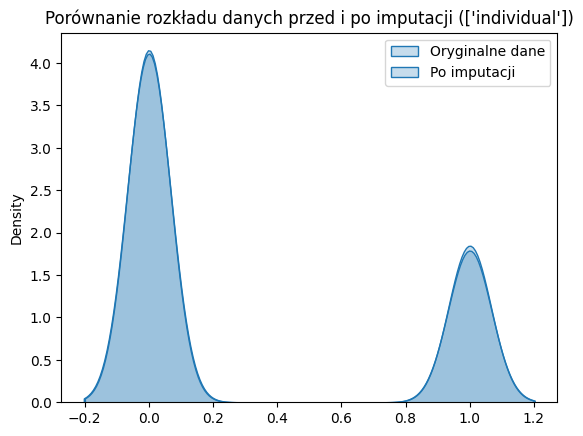

In [36]:
# Kolumna do analizy (np. 'individual')
col_to_analyze = ['individual']

# Porównanie rozkładu
sns.kdeplot(data_before_imputation[col_to_analyze].dropna(), label='Oryginalne dane', shade=True)
sns.kdeplot(df[col_to_analyze], label='Po imputacji', shade=True)
plt.title(f"Porównanie rozkładu danych przed i po imputacji ({col_to_analyze})")
plt.legend()
plt.show()

**Statystyki opisowe**

In [37]:
print("Statystyki oryginalnych danych (przed imputacją):")
data_before_imputation.describe()

Statystyki oryginalnych danych (przed imputacją):


,id,date_activ,individual,flat_area,flat_rooms,flat_furnished,flat_rent,flat_deposit,flat_for_students,building_floor_num,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
count,16139.000000,16139,14545.000000,12868.000000,12832.00000,14208.000000,16139.000000,16139.000000,13594.000000,16139.000000,...,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000
mean,8223.402379,2019-11-12 22:49:30.741681664,0.303197,49.160137,2.10279,0.494721,286.857302,1273.682676,0.272326,4.303303,...,0.051056,0.048702,0.037549,0.000867,0.007559,0.012516,0.020014,0.040399,0.401264,0.517380
min,1.000000,2014-04-05 00:00:00,0.000000,8.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4109.500000,2019-07-28 00:00:00,0.000000,38.000000,2.00000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8229.000000,2020-01-14 00:00:00,0.000000,47.300000,2.00000,0.000000,310.000000,1400.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12337.500000,2020-06-09 00:00:00,1.000000,56.000000,2.00000,1.000000,455.500000,2000.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,16448.000000,2020-09-25 00:00:00,1.000000,2200.000000,11.00000,1.000000,50000.000000,600067.000000,1.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,4749.786013,NaN,0.459655,25.941286,0.76949,0.499990,497.285450,4889.710996,0.445173,3.069569,...,0.220120,0.215251,0.190108,0.029441,0.086618,0.111177,0.140051,0.196899,0.490169,0.499713


In [38]:
print("\nStatystyki po imputacji:")
df.describe()


Statystyki po imputacji:


,id,date_activ,individual,flat_area,flat_rooms,flat_furnished,flat_rent,flat_deposit,flat_for_students,building_floor_num,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
count,16139.000000,16139,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,...,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000
mean,8223.402379,2019-11-12 22:49:30.741681664,0.307826,47.371835,2.007064,0.497553,286.857302,1273.682676,0.257637,4.303303,...,0.051056,0.048702,0.037549,0.000867,0.007559,0.012516,0.020014,0.040399,0.401264,0.517380
min,1.000000,2014-04-05 00:00:00,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4109.500000,2019-07-28 00:00:00,0.000000,36.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8229.000000,2020-01-14 00:00:00,0.000000,46.000000,2.000000,0.000000,310.000000,1400.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12337.500000,2020-06-09 00:00:00,1.000000,54.110000,2.000000,1.000000,455.500000,2000.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,16448.000000,2020-09-25 00:00:00,1.000000,2200.000000,11.000000,1.000000,50000.000000,600067.000000,1.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,4749.786013,NaN,0.461608,24.306156,0.770522,0.500010,497.285450,4889.710996,0.437346,3.069569,...,0.220120,0.215251,0.190108,0.029441,0.086618,0.111177,0.140051,0.196899,0.490169,0.499713


**Macierz korelacji** (nie jest zbyt czytelna przy tylu zmiennych)

In [39]:
# Korelacja przed imputacją
correlation_before = data_before_imputation.drop(columns=['id']).select_dtypes(include=['int', 'float']).corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_before, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Macierz korelacji przed imputacją", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Korelacja po imputacji
correlation_after = df.drop(columns=['id']).select_dtypes(include=['int', 'float']).corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_after, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Macierz korelacji po imputacji", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## 5.5 Rozdzielenie danych na df_train i df_test

In [40]:
df_train = df[df['test/train'] == 'train'].copy()  # Zbiór treningowy
df_test = df[df['test/train'] == 'test'].copy()    # Zbiór testowy

# Sprawdzenie rozmiaru danych
print("Rozmiar df_train:", df_train.shape)
print("Rozmiar df_test:", df_test.shape)

Rozmiar df_train: (11297, 58)
Rozmiar df_test: (4842, 58)


## 5.6 Usuwanie duplikatów ze zbioru df_train

In [41]:
duplicates = df_train[df_train.duplicated(subset=df_train.columns.difference(['id']), keep=False)]

# Wyświetlenie duplikatów
if not duplicates.empty:
    print("Znaleziono duplikaty w 'df_train' (bez kolumny 'id'):")
    print(duplicates[['id'] + list(df_train.columns.difference(['id']))])
else:
    print("Brak duplikatów w 'df_train' (bez kolumny 'id').")


Znaleziono duplikaty w 'df_train' (bez kolumny 'id'):
          id                                           ad_title  \
5371   14300                          Mieszkanie, 57 m², Poznań   
6940   10122      Scisłe centrum ul.Towarowa &quot;Ataner&quot;   
7431   11285      Śliczny apartament 2pok. Bóżnicza Manufaktura   
8532   11287      Śliczny apartament 2pok. Bóżnicza Manufaktura   
10657  14298                          Mieszkanie, 57 m², Poznań   
11228  10114      Scisłe centrum ul.Towarowa &quot;Ataner&quot;   
11963   4966  Kawalerka - Niskie Stałe Opłaty!!! - Centrum /...   
12111   7468   Prądzyńskiego 51, Wilda, kawalerka, Bez Prowizji   
14178   4963  Kawalerka - Niskie Stałe Opłaty!!! - Centrum /...   
14223   7472   Prądzyńskiego 51, Wilda, kawalerka, Bez Prowizji   
14738   7471   Prądzyńskiego 51, Wilda, kawalerka, Bez Prowizji   

       building_floor_num date_activ date_expire  date_modif  flat_air_cond  \
5371                    5 2020-08-07  2020-09-06  2020-09-04  

In [42]:
df_train = df_train[~df_train['id'].isin([14298, 10114, 11287, 4963, 7472, 7471])]

## 5.7 Usuwanie wartości odstających ze zbioru df_train

**1) Powierzchnia (flat_area)**

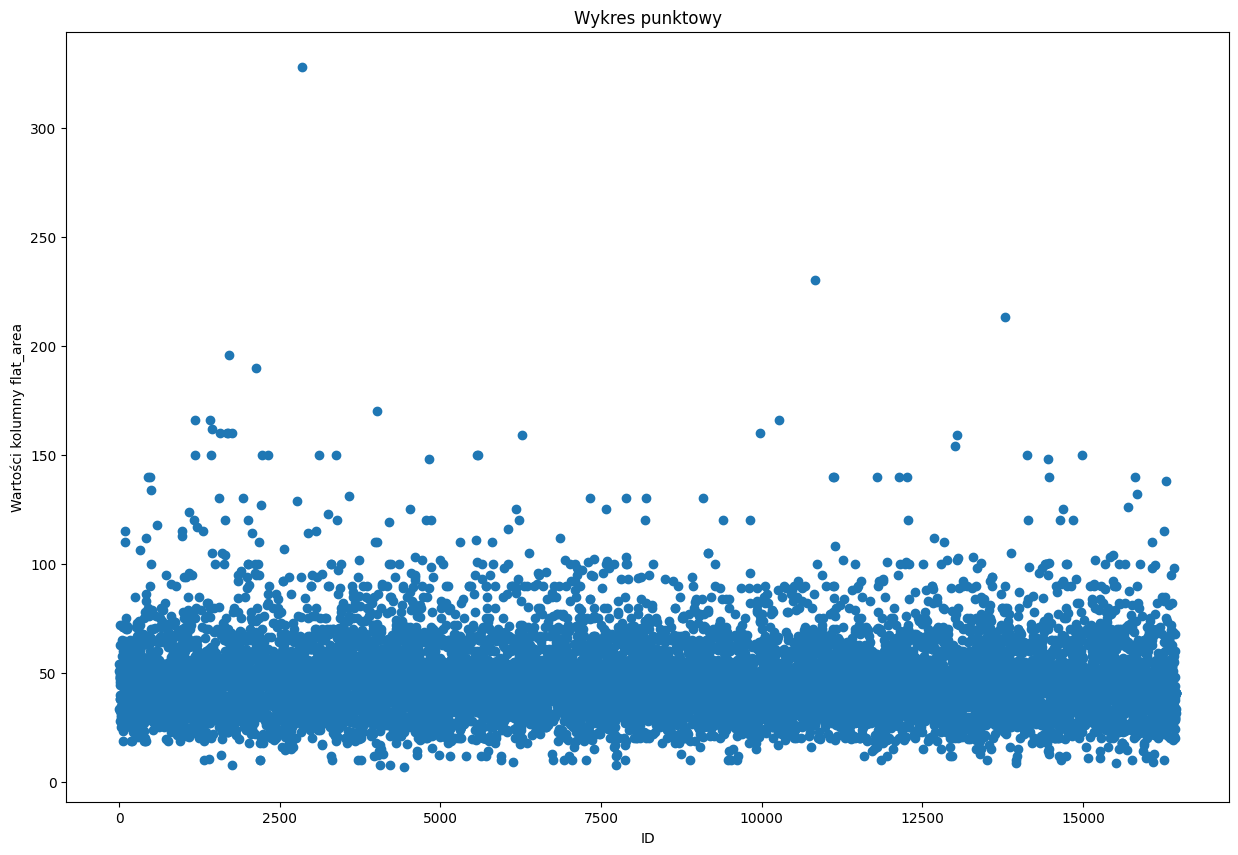

In [43]:
plt.figure(figsize=(15, 10))
plt.scatter(df_train['id'], df_train['flat_area'])
plt.title('Wykres punktowy')
plt.xlabel('ID')
plt.ylabel('Wartości kolumny flat_area')
plt.show()

In [44]:
filtered_rows = df_train[df_train['flat_area'] > 200]

# Wyświetlenie wyników
filtered_rows

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
8681,10833,Antoninek Warszawskie Nowe Miasto pokoje caly dom,2020-04-26,2020-05-12,2020-05-26,1.0,230.00,5.0,1.0,200,...,0,0,0,0,0,0,0,0,0,1
10293,2847,Do wynajęcia 2 lokale użytkowe w centrum Poznania,2019-06-10,2019-06-18,2019-07-10,0.0,328.00,11.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
15797,13783,Nowe 2 pokojowe ul Sielawy,2020-07-23,2020-08-23,2020-09-22,0.0,213.29,11.0,1.0,415,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Usuwanie wierszy z danymi odstajacymi
df_train = df_train[df_train['id'] != 10833]
df_train = df_train[df_train['id'] != 2847]
df_train = df_train[df_train['id'] != 13783]

**2) Kaucja (flat_deposit)**

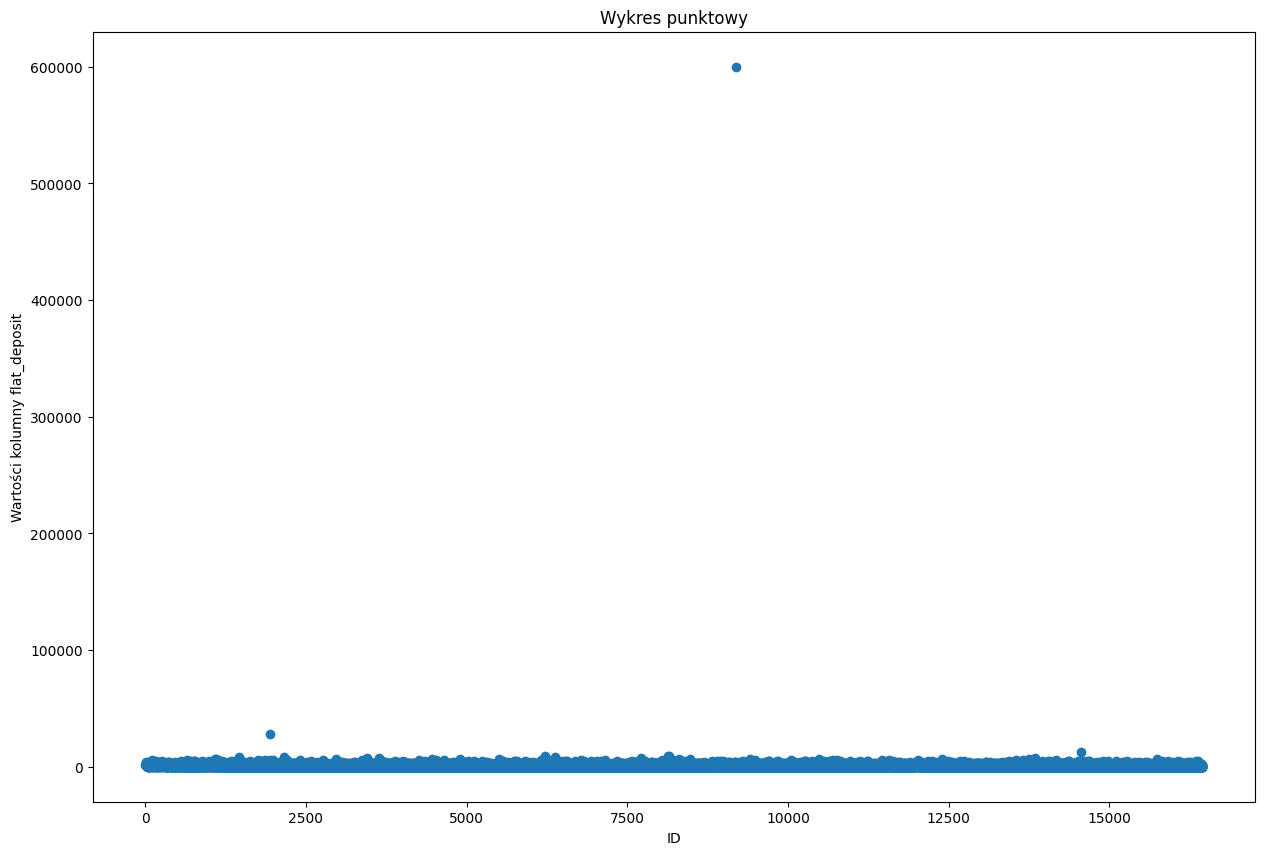

In [46]:
plt.figure(figsize=(15, 10))
plt.scatter(df_train['id'], df_train['flat_deposit'])
plt.title('Wykres punktowy')
plt.xlabel('ID')
plt.ylabel('Wartości kolumny flat_deposit')
plt.show()


In [47]:
filtered_rows = df_train[df_train['flat_deposit'] > 10000]

filtered_rows

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
5995,14563,Polna - kawalerka na Jeżycach 1200zł,2020-08-14,2020-08-14,2020-09-13,1.0,27.68,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
6094,1935,Poznań Dąbrowskiego,2019-05-05,2019-05-05,2019-06-04,1.0,50.00,3.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
11769,9199,City Park Grunwald basen sauna luksus,2020-02-17,2020-03-05,2020-03-18,0.0,67.00,2.0,1.0,1060,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_train = df_train[df_train['id'] != 14563]
df_train = df_train[df_train['id'] != 1935]
df_train = df_train[df_train['id'] != 9199]

**3) Czynsz (flat_rent)**

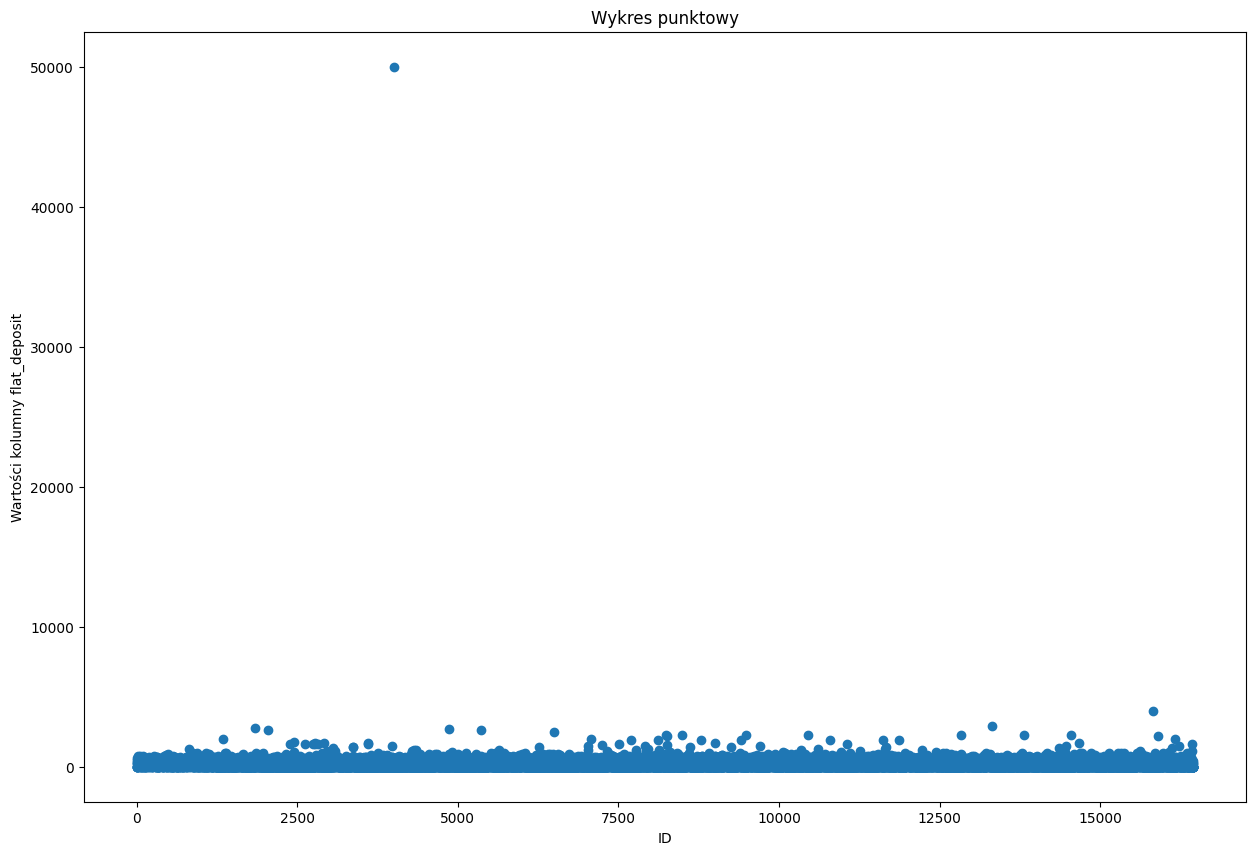

In [49]:
plt.figure(figsize=(15, 10))
plt.scatter(df_train['id'], df_train['flat_rent'])
plt.title('Wykres punktowy')
plt.xlabel('ID')
plt.ylabel('Wartości kolumny flat_deposit')
plt.show()

In [50]:
filtered_rows = df_train[df_train['flat_rent'] > 10000]

filtered_rows

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
4907,4008,"Mieszkanie, 170 m², Poznań",2019-07-24,2019-08-23,2019-09-22,0.0,170.0,11.0,0.0,50000,...,0,0,0,0,0,0,0,0,1,0


In [51]:
df_train = df_train[df_train['id'] != 4008]

In [52]:
df_train.describe()

,id,date_activ,individual,flat_area,flat_rooms,flat_furnished,flat_rent,flat_deposit,flat_for_students,building_floor_num,...,month_10,month_11,month_12,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
count,11284.000000,11284,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,...,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000,11284.000000
mean,8209.903846,2019-11-13 14:43:28.436724736,0.309553,47.247094,2.003988,0.497962,282.393566,1244.307666,0.257799,4.295906,...,0.050514,0.048033,0.039259,0.000975,0.007533,0.011343,0.019940,0.040588,0.402871,0.516749
min,1.000000,2014-04-05 00:00:00,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4113.750000,2019-07-28 00:00:00,0.000000,36.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8205.500000,2020-01-14 00:00:00,0.000000,46.000000,2.000000,0.000000,310.000000,1400.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12282.500000,2020-06-08 00:00:00,1.000000,54.552500,2.000000,1.000000,460.000000,2000.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,16448.000000,2020-09-25 00:00:00,1.000000,196.000000,11.000000,1.000000,4000.000000,9400.000000,1.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,4729.697475,NaN,0.462330,17.382772,0.763012,0.500018,273.739647,1283.270870,0.437442,3.093981,...,0.219013,0.213845,0.194219,0.031208,0.086468,0.105905,0.139799,0.197344,0.490497,0.499742


In [53]:
# One-Hot Encoding na kolumnie kategorycznej quarter w zbiorze treningowym

# Inicjalizacja One-Hot Encoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')  # handle_unknown='ignore' - ignoruje nieznane kategorie

# Dopasowanie i transformacja danych
encoded_quarter_train = encoder.fit_transform(df_train[['quarter']])

# Tworzenie DataFrame z zakodowanymi kolumnami
df_train_encoded = pd.DataFrame(encoded_quarter_train, columns=encoder.get_feature_names_out(['quarter']))

# Połączenie zakodowanych kolumn z oryginalnymi danymi
df_train = pd.concat([df_train.reset_index(drop=True).drop(columns=['quarter']), df_train_encoded.reset_index(drop=True)], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
# Sprawdzenie listy kolumn w df_train
print(list(df_train.columns))

['id', 'ad_title', 'date_activ', 'date_modif', 'date_expire', 'individual', 'flat_area', 'flat_rooms', 'flat_furnished', 'flat_rent', 'flat_deposit', 'flat_for_students', 'building_floor_num', 'flat_balcony', 'flat_utility_room', 'flat_garage', 'flat_basement', 'flat_garden', 'flat_tarrace', 'flat_lift', 'flat_two_level', 'flat_kitchen_sep', 'flat_air_cond', 'flat_nonsmokers', 'flat_washmachine', 'flat_dishwasher', 'flat_fridge', 'flat_cooker', 'flat_oven', 'flat_internet', 'flat_television', 'flat_anti_blinds', 'flat_monitoring', 'flat_closed_area', 'test/train', 'price', 'month', 'year', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'quarter_Bajkowe', 'quarter_Biała Góra', 'quarter_Bonin', 'quarter_Centrum', 'quarter_Chartowo', 'quarter_Chwaliszewo', 'quarter_Czekalskie', 'quarter_Dolna Wilda', 'quarter_Dęb

## 5.6 Predykcja

## 5.6.1 Przygotowanie danych

**!!! Przy tworzeniu raportu zauważyłam, że przy tworzeniu X nie usunęłam z df_train zbędnych kolumn 'month' i 'year'.**

In [55]:
X = df_train.drop(columns=['id', 'ad_title', 'date_activ', 'date_modif','date_expire','test/train', 'price'])
y = df_train['price']

In [56]:
# Podział na dane treningowe i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## 5.6.2 Przegląd modeli regresyjnych

In [57]:
# Porównanie wyników różnych algorytmów regresji z domyślnymi wartościami parametrów
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'XGBoost': XGBRegressor(random_state=SEED),
    'AdaBoost': AdaBoostRegressor(random_state=SEED),
    'CatBoost': CatBoostRegressor(random_state=SEED),
    'LGBM': LGBMRegressor(random_state=SEED),
    'Gradient Boosting': GradientBoostingRegressor(random_state=SEED),
    'Extra Trees': ExtraTreesRegressor(random_state=SEED),
    'KNN': KNeighborsRegressor(),
    'Bagging': BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=SEED),
}

results = []

for name, model in models.items():
    # Trenowanie modelu
    model.fit(X_train, y_train)

    # Predykcja na danych testowych
    y_pred = model.predict(X_test)

    # Ocena modelu
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })

# Wyświetlenie wyników
results_df = pd.DataFrame(results)
print(results_df)

Learning rate set to 0.057964
0:	learn: 539.7825144	total: 51.9ms	remaining: 51.8s
1:	learn: 526.0731553	total: 56.8ms	remaining: 28.4s
2:	learn: 513.8549659	total: 61.1ms	remaining: 20.3s
3:	learn: 502.5698154	total: 65.2ms	remaining: 16.2s
4:	learn: 491.4393323	total: 69.3ms	remaining: 13.8s
5:	learn: 481.8620652	total: 73.4ms	remaining: 12.2s
6:	learn: 472.1811575	total: 77.8ms	remaining: 11s
7:	learn: 463.4552294	total: 82.2ms	remaining: 10.2s
8:	learn: 454.7045073	total: 86.3ms	remaining: 9.51s
9:	learn: 447.3139405	total: 90.5ms	remaining: 8.96s
10:	learn: 440.3146539	total: 97.3ms	remaining: 8.74s
11:	learn: 434.4956816	total: 101ms	remaining: 8.33s
12:	learn: 429.1408193	total: 106ms	remaining: 8.02s
13:	learn: 423.8255269	total: 110ms	remaining: 7.72s
14:	learn: 418.1592173	total: 114ms	remaining: 7.49s
15:	learn: 413.2333557	total: 118ms	remaining: 7.28s
16:	learn: 408.8415383	total: 122ms	remaining: 7.07s
17:	learn: 404.3258898	total: 126ms	remaining: 6.89s
18:	learn: 400.34

## 5.6.3 CatBoost

In [58]:
# Inicjalizacja modelu CatBoostRegressor z hiperparametrami
catboost = CatBoostRegressor(
    iterations=1000,           # Liczba iteracji (drzew)
    depth=10,                  # Głębokość drzewa
    learning_rate=0.09,        # Współczynnik uczenia
    l2_leaf_reg = 1,           # Regularyzacja L2 dla liści
    border_count = 128,        # Liczba punktów granicznych
    subsample = 0.5,           # Proporcja próby do budowy drzewa
    verbose = 200,             # Wyświetlanie postępu co 200 iteracji
    random_seed = SEED         # Ustalenie ziarna dla powtarzalności
)

# Trenowanie modelu na danych treningowych
catboost.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = catboost.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

0:	learn: 528.4463470	total: 31.9ms	remaining: 31.9s
200:	learn: 206.3683014	total: 5.58s	remaining: 22.2s
400:	learn: 157.8820765	total: 12.6s	remaining: 18.9s
600:	learn: 127.5798344	total: 18.2s	remaining: 12.1s
800:	learn: 105.4403191	total: 24.5s	remaining: 6.09s
999:	learn: 88.2997916	total: 30.9s	remaining: 0us
MAE: 207.39809761017156
RMSE: 288.0085779599952
R²: 0.7134144639174762


## 5.6.4 Random Forest

In [59]:
# Inicjalizacja modelu RandomForestRegressor z hiperparametrami
rf = RandomForestRegressor(
    n_estimators=850,          # Liczba drzew
    max_depth=29,              # Maksymalna głębokość drzewa
    min_samples_split=2,       # Minimalna liczba próbek do podziału węzła
    min_samples_leaf=1,        # Minimalna liczba próbek w liściu drzewa
    max_features='auto',       # Liczba cech rozważanych przy podziale węzła (max_features='auto' bierze pod uwagę wszystkie cechy przy każdym podziale)
    bootstrap=True,            # Użycie próbkowania bootstrap przy budowie drzew
    random_state=SEED,
    verbose=0                  # Wyłączony postęp treningu
)


# Trenowanie modelu na danych treningowych
rf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = rf.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 207.6234037617727
RMSE: 293.1804357298083
R²: 0.7030294426262691


## 5.6.5 Bagging

In [60]:
# Inicjalizacja modelu BaggingRegressor z hiperparametrami
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=30, random_state=SEED),  # Podstawowy estimator: drzewo decyzyjne z głębokością 30
    n_estimators= 350,   # Liczba drzew
    max_samples= 1.0,    # Proporcja próbek, które są używane do trenowania każdego estymatora
    max_features= 0.8,   # Proporcja cech, które są używane do trenowania każdego estymatora
    random_state= SEED
)

# Trenowanie modelu na danych treningowych
bagging.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = bagging.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 206.3186894421098
RMSE: 287.3915169333954
R²: 0.7146411726833908


## 5.6.6 AdaBoost

In [61]:
# Inicjalizacja modelu AdaBoostRegressor z hiperparametrami
adaboost = AdaBoostRegressor(
    n_estimators=600,            # Liczba drzew
    learning_rate=0.1,           # Współczynnik uczenia
    loss='linear',               # Funkcja straty (linear) stosowana do wag dla błędów
    base_estimator=DecisionTreeRegressor(max_depth=30, random_state=SEED),  # Podstawowy estimator: drzewo decyzyjne z maksymalną głębokością 30
    random_state=SEED
)

# Trenowanie modelu na danych treningowych
adaboost.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = adaboost.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 198.05074768561957
RMSE: 290.34735576164456
R²: 0.7087411217387716


## 5.6.7 LGBM

In [62]:
# Inicjalizacja modelu LGBMRegressor z hiperparametrami
lgbm = LGBMRegressor(
    n_estimators= 600,            # Liczba drzew
    learning_rate= 0.1,           # Współczynnik uczenia
    max_depth= 15,                # Maksymalna głębokość drzewa
    num_leaves= 100,              # Liczba liści w każdym drzewie
    min_child_samples= 20,        # Minimalna liczba próbek w liściu
    subsample= 0.8,               # Proporcja próbek wykorzystywanych do trenowania każdego drzewa
    colsample_bytree= 0.6,        # Proporcja cech wykorzystywanych przy każdym drzewie
    reg_alpha= 1.0,               # Regularyzacja L1 (Lasso)
    reg_lambda= 0.0,              # Regularyzacja L2 (Ridge)
    random_state= SEED
)

# Trenowanie modelu na danych treningowych
lgbm.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = lgbm.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 9027, number of used features: 87
[LightGBM] [Info] Start training from score 1733.038440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

## 5.6.8 ExtraTrees

In [63]:
# Inicjalizacja modelu ExtraTreesRegressor z hiperparametrami
et = ExtraTreesRegressor(
    n_estimators=600,            # Liczba drzew
    max_depth=40,                # Maksymalna głębokość drzewa
    min_samples_split=3,         # Minimalna liczba próbek do podziału węzła
    min_samples_leaf=1,          # Minimalna liczba próbek w liściu drzewa
    random_state=SEED
)

# Trenowanie modelu na danych treningowych
et.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = et.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 208.58457498943994
RMSE: 292.0860240985975
R²: 0.7052424240004482


## 5.6.9 XGBoost

In [64]:
# Inicjalizacja modelu XGBRegressor z hiperparametrami
xgb = XGBRegressor(
    n_estimators=250,            # Liczba drzew
    max_depth=5,                 # Maksymalna głębokość drzewa
    learning_rate=0.2,           # Współczynnik uczenia
    min_child_weight=1,          # Minimalna waga próbek w liściu
    subsample=0.9,               # Proporcja próbek wykorzystywanych do trenowania każdego drzewa
    colsample_bytree=1,          # Proporcja cech wykorzystywanych przy każdym drzewie
    random_state=SEED
)

# Trenowanie modelu na danych treningowych
xgb.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = xgb.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 215.46962872236028
RMSE: 294.9303445603472
R²: 0.6994738009733384


## 5.6.10 Stacking Regressor





Przed uruchomieniem modelu StackingRegressor przeprowadzono wstępną ocenę wydajności ośmiu modeli finalnych takich jak: RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor, CatBoostRegressor, ElasticNet, MLPRegressor, Ridge.

Najlepszy wynik uzyskano za pomocą ElasticNet.

Optymalizacja parametrów **ElasticNet** jako najlepszego modelu finalnego za pomocą GridSearchCV:

In [65]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.5, 0.95, 0.6, 0.4],
}

elastic_net = ElasticNet(random_state=SEED)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

best_elastic_net = grid_search.best_estimator_
# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry: ", grid_search.best_params_)

Najlepsze parametry:  {'alpha': 0.01, 'l1_ratio': 0.6}


In [66]:
base_models = [
    ('catboost', catboost),
    ('bagging', bagging),
    ('adaboost', adaboost),
    ('lgbm', lgbm),
    ('extratrees', et),
    ('xgb', xgb),
    ('rf', rf)

]

# Model meta (finalny model)
final_model = ElasticNet(alpha= 0.01, l1_ratio= 0.6, random_state=SEED)

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=final_model, n_jobs=-1)

# Trenowanie Stacking Regressor na danych treningowych
stacking_regressor.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = stacking_regressor.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+08, tolerance: 2.779e+05
  model = cd_fast.enet_coordinate_descent(


MAE: 197.79303146660573
RMSE: 278.9660974174075
R²: 0.7311275676556854


**Wyniki:** \
MAE: 197.79303146660573 \
RMSE: 278.9660974174075 \
R²: 0.7311275676556854

## 5.6.11 VotingRegressor

In [67]:
voting_regressor = VotingRegressor(estimators=[
    ('catboost', catboost),
    ('bagging', bagging),
    ('adaboost', adaboost),
    ('lgbm', lgbm),
    ('extratrees', et),
    ('xgb', xgb),
    ('rf', rf)
])

# Trenowanie Voting Regressor na danych treningowych
voting_regressor.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = voting_regressor.predict(X_test)

# Obliczenie błędów: MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

0:	learn: 528.4463470	total: 65.1ms	remaining: 1m 5s
200:	learn: 206.3683014	total: 6.75s	remaining: 26.8s
400:	learn: 157.8820765	total: 12.3s	remaining: 18.4s
600:	learn: 127.5798344	total: 20s	remaining: 13.3s
800:	learn: 105.4403191	total: 25.6s	remaining: 6.35s
999:	learn: 88.2997916	total: 33s	remaining: 0us


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 9027, number of used features: 87
[LightGBM] [Info] Start training from score 1733.038440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 199.52284391098328
RMSE: 280.0458828287353
R²: 0.7290421070372213


## 5.6.12 Zapis wyniku do CSV

In [68]:
# Transformacja kolumny quarter w df_test za pomocą OneHotEncoder
encoded_quarter_test = encoder.transform(df_test[['quarter']])

# Stworzenie DataFrame z zakodowanymi kolumnami
encoded_quarter_test_df = pd.DataFrame(encoded_quarter_test, columns=encoder.get_feature_names_out(['quarter']))

# Usunięcie oryginalnej kolumny 'quarter' z df_test i dodanie zakodowanych kolumn
df_test_encoded = pd.concat([df_test.reset_index(drop=True).drop(columns=['quarter']),
                             encoded_quarter_test_df.reset_index(drop=True)], axis=1)

# Sprawdzenie wyniku
print(df_test_encoded.head())

   id                                         ad_title date_activ  date_modif  \
0   4                        wynajmę mieszkanie poznan 2014-08-10  2020-03-03   
1   5  Kawalerka Poznań Rataje niska zabudowa 2 piętro 2014-08-17  2019-11-15   
2   9       Kawalerka, w szeregowcu z osobnym wejściem 2014-09-23  2019-11-13   
3  20          Wynajmę mieszkanie 4 pokojowe Winogrady 2015-01-29  2019-06-03   
4  23                    Apartament z tarasem na dachu 2015-03-04  2019-11-07   

  date_expire  individual  flat_area  flat_rooms  flat_furnished  flat_rent  \
0  2020-03-10         1.0      49.00         2.0             1.0          0   
1  2019-12-15         1.0      31.68         1.0             1.0        350   
2  2019-12-12         1.0      26.66         1.0             1.0        300   
3  2019-07-01         1.0      78.26         4.0             1.0        700   
4  2019-11-27         1.0      76.00         3.0             1.0        800   

   ...  quarter_Winogrady  quarter_Wol

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [69]:
# Przygotowanie danych testowych
X_do_testu = df_test_encoded.drop(columns=['id', 'ad_title', 'date_activ', 'date_modif','date_expire','test/train', 'price'])

In [70]:
print("Cechy X_train:", X_train.columns.tolist())
print("Cechy X_do_testu:", X_do_testu.columns.tolist())

Cechy X_train: ['individual', 'flat_area', 'flat_rooms', 'flat_furnished', 'flat_rent', 'flat_deposit', 'flat_for_students', 'building_floor_num', 'flat_balcony', 'flat_utility_room', 'flat_garage', 'flat_basement', 'flat_garden', 'flat_tarrace', 'flat_lift', 'flat_two_level', 'flat_kitchen_sep', 'flat_air_cond', 'flat_nonsmokers', 'flat_washmachine', 'flat_dishwasher', 'flat_fridge', 'flat_cooker', 'flat_oven', 'flat_internet', 'flat_television', 'flat_anti_blinds', 'flat_monitoring', 'flat_closed_area', 'month', 'year', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'quarter_Bajkowe', 'quarter_Biała Góra', 'quarter_Bonin', 'quarter_Centrum', 'quarter_Chartowo', 'quarter_Chwaliszewo', 'quarter_Czekalskie', 'quarter_Dolna Wilda', 'quarter_Dębiec', 'quarter_Edwardowo', 'quarter_Fabianowo', 'quarter_Franowo', 'q

In [71]:
X_do_testu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Columns: 125 entries, individual to quarter_Żegrze
dtypes: float64(87), int32(2), int64(36)
memory usage: 4.6 MB


In [72]:
df_test_encoded['price'] = stacking_regressor.predict(X_do_testu)

In [73]:
# Zmiana wartości w kolumnie 'id', aby zaczynały się od 1
df_test_encoded['id'] = range(1, len(df_test_encoded) + 1)

# Sprawdzenie wyników
df_test_encoded['id'].head()

,id
0,1
1,2
2,3
3,4
4,5


In [74]:
df_test_encoded.rename(columns={'id': 'ID', 'price': 'TARGET'}, inplace=True)

In [75]:
df_test_encoded['TARGET'] = df_test_encoded['TARGET'].round(2)

In [76]:
df_test_encoded

,ID,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,quarter_Winogrady,quarter_Wola,quarter_Zawady,quarter_Zieliniec,quarter_Ławica,quarter_Łazarz,quarter_Śródka,quarter_Świerczewo,quarter_Święty Roch,quarter_Żegrze
0,1,wynajmę mieszkanie poznan,2014-08-10,2020-03-03,2020-03-10,1.0,49.00,2.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Kawalerka Poznań Rataje niska zabudowa 2 piętro,2014-08-17,2019-11-15,2019-12-15,1.0,31.68,1.0,1.0,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Kawalerka, w szeregowcu z osobnym wejściem",2014-09-23,2019-11-13,2019-12-12,1.0,26.66,1.0,1.0,300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Wynajmę mieszkanie 4 pokojowe Winogrady,2015-01-29,2019-06-03,2019-07-01,1.0,78.26,4.0,1.0,700,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Apartament z tarasem na dachu,2015-03-04,2019-11-07,2019-11-27,1.0,76.00,3.0,1.0,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,4838,"3 pokoje, Jagiełły, Piątkowo bezpośrednio",2020-09-25,2020-09-25,2020-10-25,1.0,50.00,3.0,1.0,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4838,4839,"Mieszkanie, 75 m², Poznań",2020-09-25,2020-09-25,2020-10-25,0.0,75.00,3.0,0.0,750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4839,4840,"Dwa pokoje z balkonem, Poznań, Bez prowizji",2020-09-25,2020-09-25,2020-10-25,0.0,52.20,2.0,0.0,181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4840,4841,Mieszkanie w kamienicy na Jeżycach/ Apt for rent,2020-09-25,2020-09-25,2020-10-25,1.0,100.00,3.0,1.0,455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Zapisanie wyników do pliku CSV
df_test_encoded[['ID', 'TARGET']].to_csv('podejscie_21.csv', index=False)

## Dodatek

Wyszukanie ogłoszeń, w których w tytule znajduje się 'zł'

In [78]:
filtered_rows = df_test_encoded[df_test_encoded['ad_title'].str.contains('zł', case=False, na=False)]

filtered_rows[['ID', 'ad_title','TARGET']]

,ID,ad_title,TARGET
208,209,"2 pokoje,43 m kw,1420zł, bezpośrednio z parkingi",1602.00
335,336,"Wyposażony pokój jednoosobowy 15m2- 920zł, Wilda",1072.06
398,399,Kawalerka z balkonem 950 zł Do Wynajęcia Poznań,1091.88
456,457,1250 zł okazja 30m2,1354.94
685,686,"Winogrady, 3 pok. wynajem 1600,-zł",1613.96
...,...,...,...
4729,4730,"os. Piastowskie, Rondo Rataje - 2 pokojowe 1100zł",1242.19
4754,4755,"Poznań, Wilda, kawalerka na wynajem, 29,5m, 80...",1184.24
4812,4813,Mieszkanie 45 mkw. dwupokojowe w bloku 900zł,1607.61
4814,4815,"Kawalerka po remoncie, 1650zł ze wszystkim.",1243.70


Ceny zmieniano ręcznie, ponieważ w niektórych ogłoszeniach była informacja o samym czynszu.

In [79]:
df_test_encoded.loc[df_test_encoded['ID'] == 209, 'TARGET'] = 1420
df_test_encoded.loc[df_test_encoded['ID'] == 336, 'TARGET'] = 920
df_test_encoded.loc[df_test_encoded['ID'] == 399, 'TARGET'] = 950
df_test_encoded.loc[df_test_encoded['ID'] == 457, 'TARGET'] = 1250
df_test_encoded.loc[df_test_encoded['ID'] == 686, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 717, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 787, 'TARGET'] = 800
df_test_encoded.loc[df_test_encoded['ID'] == 788, 'TARGET'] = 850
df_test_encoded.loc[df_test_encoded['ID'] == 867, 'TARGET'] = 2100
df_test_encoded.loc[df_test_encoded['ID'] == 880, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 914, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 917, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 1001, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 1097, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 1128, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 1173, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 1313, 'TARGET'] = 1700
df_test_encoded.loc[df_test_encoded['ID'] == 1341, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 1421, 'TARGET'] = 950
df_test_encoded.loc[df_test_encoded['ID'] == 1423, 'TARGET'] = 3800
df_test_encoded.loc[df_test_encoded['ID'] == 1520, 'TARGET'] = 1100
df_test_encoded.loc[df_test_encoded['ID'] == 1583, 'TARGET'] = 825
df_test_encoded.loc[df_test_encoded['ID'] == 1665, 'TARGET'] = 1800
df_test_encoded.loc[df_test_encoded['ID'] == 1804, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 1818, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 1874, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 1966, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 2115, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 2425, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 2504, 'TARGET'] = 2000
df_test_encoded.loc[df_test_encoded['ID'] == 2548, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 2605, 'TARGET'] = 1150
df_test_encoded.loc[df_test_encoded['ID'] == 2640, 'TARGET'] = 1130
df_test_encoded.loc[df_test_encoded['ID'] == 2661, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 2665, 'TARGET'] = 780
df_test_encoded.loc[df_test_encoded['ID'] == 2700, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 2883, 'TARGET'] = 999
df_test_encoded.loc[df_test_encoded['ID'] == 2969, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 3011, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 3105, 'TARGET'] = 1370
df_test_encoded.loc[df_test_encoded['ID'] == 3172, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 3304, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 3307, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 3399, 'TARGET'] = 1080
df_test_encoded.loc[df_test_encoded['ID'] == 3400, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 3531, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 3759, 'TARGET'] = 1100
df_test_encoded.loc[df_test_encoded['ID'] == 3841, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 3845, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 3991, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 4137, 'TARGET'] = 1500
df_test_encoded.loc[df_test_encoded['ID'] == 4164, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 4204, 'TARGET'] = 1110
df_test_encoded.loc[df_test_encoded['ID'] == 4224, 'TARGET'] = 1000
df_test_encoded.loc[df_test_encoded['ID'] == 4229, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 4266, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 4317, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 4369, 'TARGET'] = 1100
df_test_encoded.loc[df_test_encoded['ID'] == 4411, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 4417, 'TARGET'] = 1600
df_test_encoded.loc[df_test_encoded['ID'] == 4470, 'TARGET'] = 1400
df_test_encoded.loc[df_test_encoded['ID'] == 4517, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 4581, 'TARGET'] = 1100
df_test_encoded.loc[df_test_encoded['ID'] == 4636, 'TARGET'] = 1300
df_test_encoded.loc[df_test_encoded['ID'] == 4654, 'TARGET'] = 1130
df_test_encoded.loc[df_test_encoded['ID'] == 4657, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 4691, 'TARGET'] = 1200
df_test_encoded.loc[df_test_encoded['ID'] == 4730, 'TARGET'] = 1100
df_test_encoded.loc[df_test_encoded['ID'] == 4755, 'TARGET'] = 800
df_test_encoded.loc[df_test_encoded['ID'] == 4813, 'TARGET'] = 900
df_test_encoded.loc[df_test_encoded['ID'] == 4815, 'TARGET'] = 1650
df_test_encoded.loc[df_test_encoded['ID'] == 4824, 'TARGET'] = 950


In [80]:
# Zapisanie wyników do pliku CSV
df_test_encoded[['ID', 'TARGET']].to_csv('podejscie_22.csv', index=False)